fitness_analysis.ipynb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,4)

In [3]:

df = pd.read_excel('fitness_data.xlsx')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

display(df.head())
display(df.info())
display(df.isna().sum())

,Date,Workout Duration,Workout Type,Calories Burned,Sleep Duration,Sleep Quality
0,2025-10-27,0,empty,100,7,Good
1,2025-10-28,80,Cardio,300,8,Good
2,2025-10-29,60,Strength,250,7,Good
3,2025-10-30,70,Cardio,340,8,Good
4,2025-10-31,60,Strength,280,7,Good


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              31 non-null     datetime64[ns]
 1   Workout Duration  31 non-null     int64         
 2   Workout Type      31 non-null     object        
 3   Calories Burned   31 non-null     int64         
 4   Sleep Duration    31 non-null     int64         
 5   Sleep Quality     31 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 1.6+ KB


None

,0
Date,0
Workout Duration,0
Workout Type,0
Calories Burned,0
Sleep Duration,0
Sleep Quality,0


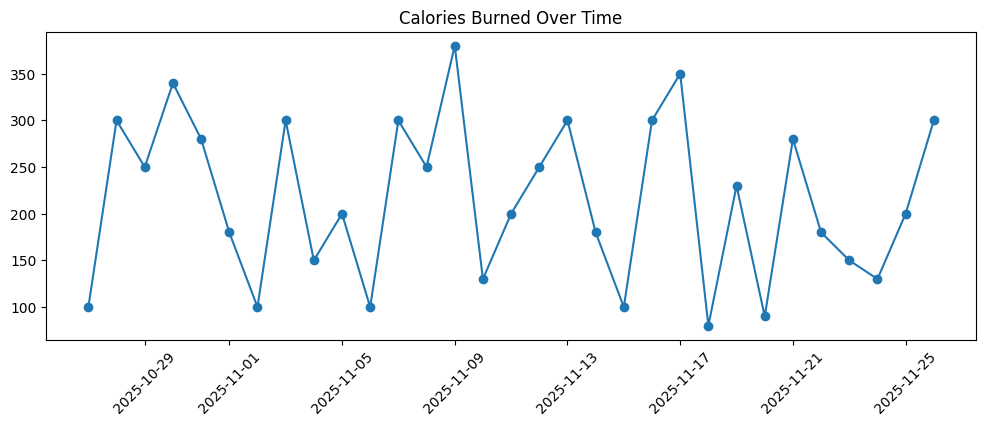

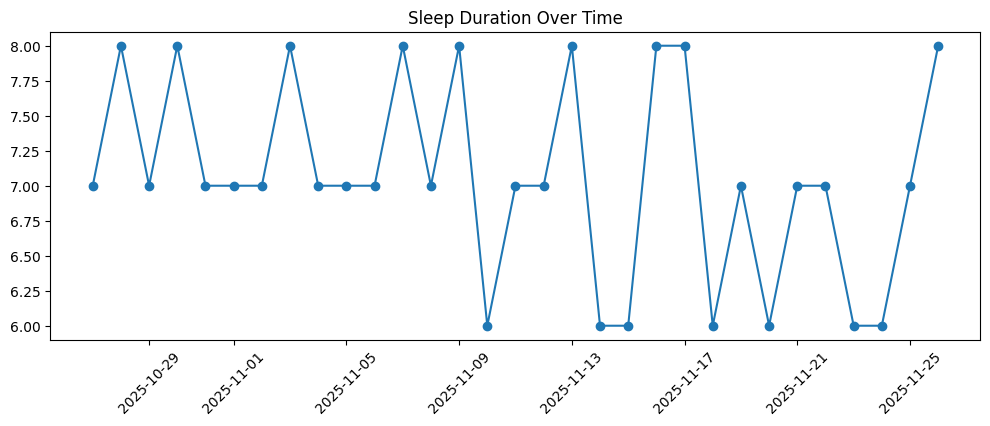

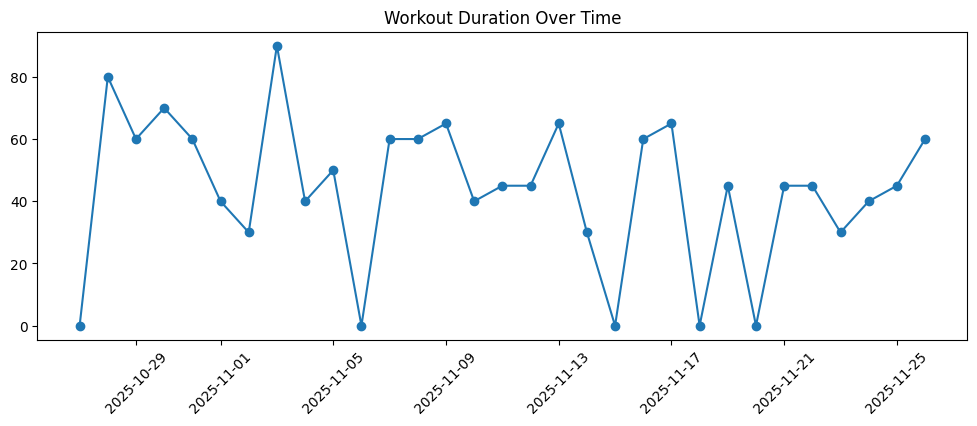

In [4]:
if 'Calories Burned' in df.columns:
    plt.figure()
    plt.plot(df['Date'], df['Calories Burned'], marker='o')
    plt.title("Calories Burned Over Time")
    plt.xticks(rotation=45)
    plt.show()

if 'Sleep Duration' in df.columns:
    plt.figure()
    plt.plot(df['Date'], df['Sleep Duration'], marker='o')
    plt.title("Sleep Duration Over Time")
    plt.xticks(rotation=45)
    plt.show()

if 'Workout Duration' in df.columns:
    plt.figure()
    plt.plot(df['Date'], df['Workout Duration'], marker='o')
    plt.title("Workout Duration Over Time")
    plt.xticks(rotation=45)
    plt.show()

,Workout Duration,Calories Burned,Sleep Duration
Workout Duration,1.000000,0.873333,0.737991
Calories Burned,0.873333,1.000000,0.825091
Sleep Duration,0.737991,0.825091,1.000000


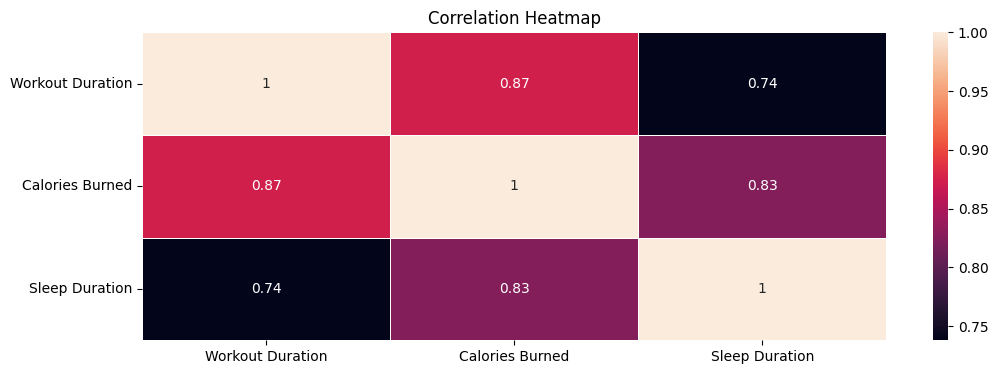

In [5]:
num_cols = [c for c in ['Workout Duration','Calories Burned','Sleep Duration','Steps Count'] if c in df.columns]
corr = df[num_cols].corr()
display(corr)

sns.heatmap(corr, annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [6]:
print("HYPOTHESIS TESTING\n")

# H1: Pearson correlation Sleep vs Calories
if {'Sleep Duration','Calories Burned'}.issubset(df.columns):
    r, p = stats.pearsonr(df['Sleep Duration'].dropna(), df['Calories Burned'].dropna())
    print(f"H1 Sleep ↔ Calories: r={r:.3f}, p={p:.4f}")

# H2/H3: Workout day t-test
if 'Workout Duration' in df.columns:
    df['Workout Day'] = df['Workout Duration'] > 0

if 'Workout Day' in df.columns and 'Calories Burned' in df.columns:
    w = df[df['Workout Day']==True]['Calories Burned'].dropna()
    nw = df[df['Workout Day']==False]['Calories Burned'].dropna()
    if len(w)>1 and len(nw)>1:
        t, p = stats.ttest_ind(w, nw, equal_var=False)
        print(f"H2 Calories Workout vs Rest: t={t:.3f}, p={p:.4f}")

if 'Workout Day' in df.columns and 'Sleep Duration' in df.columns:
    w_sleep = df[df['Workout Day']==True]['Sleep Duration'].dropna()
    nw_sleep = df[df['Workout Day']==False]['Sleep Duration'].dropna()
    if len(w_sleep)>1 and len(nw_sleep)>1:
        t, p = stats.ttest_ind(w_sleep, nw_sleep, equal_var=False)
        print(f"H3 Sleep Workout vs Rest: t={t:.3f}, p={p:.4f}")

# H4: ANOVA by weekday
if 'Date' in df.columns and 'Calories Burned' in df.columns:
    df['Weekday'] = df['Date'].dt.day_name()
    groups = [g['Calories Burned'].values for n, g in df.groupby('Weekday') if len(g)>1]
    if len(groups) > 1:
        F, p = stats.f_oneway(*groups)
        print(f"H4 Calories by Weekday ANOVA: F={F:.3f}, p={p:.4f}")

HYPOTHESIS TESTING

H1 Sleep ↔ Calories: r=0.825, p=0.0000
H2 Calories Workout vs Rest: t=9.445, p=0.0000
H3 Sleep Workout vs Rest: t=2.827, p=0.0265
H4 Calories by Weekday ANOVA: F=0.486, p=0.8118


## Results
- Findings will be written here.

## Next Steps
- Missing data handling, feature engineering, machine learning.